## Quantum random walk

### The Hadamard gate

The Hadamard operator is:

\begin{equation*}
    C \triangleq \frac{1}{\sqrt{2}} \begin{pmatrix}
                                1 & 1 \\
                                1 & -1
                            \end{pmatrix}
\end{equation*}
 
It creates states of superposition when acts on the standard basis:

\begin{align*}
    |\uparrow\rangle \triangleq \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\ \\
    |\downarrow\rangle \triangleq \begin{pmatrix} 0 \\ 1 \end{pmatrix} \\ \\

    C |\uparrow\rangle = \frac{|\uparrow\rangle + |\downarrow\rangle}{\sqrt{2}} \\ \\
    C |\downarrow\rangle = \frac{|\uparrow\rangle - |\downarrow\rangle}{\sqrt{2}}
\end{align*}

In [1]:
# Importing SymPy
import sympy as smp

In [2]:
# Defining C
C = smp.Matrix([[1, 1],
                [1, -1]]) / smp.sqrt(2)
C

Matrix([
[sqrt(2)/2,  sqrt(2)/2],
[sqrt(2)/2, -sqrt(2)/2]])

In [3]:
# Computing eigenvalues and eigenvectors of C
eig = C.eigenvects(multiple = True, simplify = True)
eig

[(-1,
  1,
  [Matrix([
   [1 - sqrt(2)],
   [          1]])]),
 (1,
  1,
  [Matrix([
   [1 + sqrt(2)],
   [          1]])])]

In [4]:
# Normalizing
a = eig[0][2][0]
a = (a / a.norm()).applyfunc(smp.simplify)
a

Matrix([
[(-2 + sqrt(2))/(2*sqrt(2 - sqrt(2)))],
[       sqrt(2)/(2*sqrt(2 - sqrt(2)))]])

In [5]:
b = eig[1][2][0]
b = (b / b.norm()).applyfunc(smp.simplify)
b

Matrix([
[          sqrt(sqrt(2) + 2)/2],
[sqrt(2)/(2*sqrt(sqrt(2) + 2))]])

In [6]:
# Proof: a and b are unit vectors
a.norm().simplify()

1

In [7]:
b.norm().simplify()

1

In [8]:
# Proof: a and b are mutually orthogonal
a.dot(b).simplify()

0

In [9]:
# C acting con (1, 0)
C * smp.Matrix([1, 0])

Matrix([
[sqrt(2)/2],
[sqrt(2)/2]])

In [10]:
# C acting con (0, 1)
C * smp.Matrix([0, 1])

Matrix([
[ sqrt(2)/2],
[-sqrt(2)/2]])

## The shift operator

The shift operator S is defined as follows:

\begin{equation*}
  S \triangleq \sum_{k} \left( 
    | \uparrow \rangle \langle \uparrow | \otimes |k + 1 \rangle \langle k| 
    + 
    | \downarrow \rangle \langle \downarrow | \otimes |k - 1 \rangle \langle k| 
\right)
\end{equation*}

$S$ acts on the complete state space, which is given by the Kronecker product of the coin and position spaces. The position states $| k \rangle$ are, assuming for example 7 discrete positions:

\begin{equation*}
  | 0 \rangle \triangleq \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} \quad
  | 1 \rangle \triangleq \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} \quad
  | - 1 \rangle \triangleq \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \end{pmatrix} \quad
  | 2 \rangle \triangleq \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} \quad
  | - 2 \rangle \triangleq \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{pmatrix} \quad
  | 3 \rangle \triangleq \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} \quad
  | - 3 \rangle \triangleq \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{pmatrix} \quad
\end{equation*}

Given matrices $A$ and $B$, their Kronecker product is:

\begin{equation*}
  A \otimes B \triangleq 
  \begin{pmatrix}
    a_{11}B & \cdots & a_{1n}B \\
    \vdots & \ddots & \vdots \\
    a_{m1}B & \cdots & a_{mn}B
  \end{pmatrix}
\end{equation*}

where $a_{ij}$ are elements of $A$

In [11]:
# Importing the tensor product function
from sympy.physics.quantum import TensorProduct

In [12]:
# Defining some position states
posm3 = smp.Matrix([1, 0, 0, 0, 0, 0, 0])
posm2 = smp.Matrix([0, 1, 0, 0, 0, 0, 0])
posm1 = smp.Matrix([0, 0, 1, 0, 0, 0, 0])
pos0 = smp.Matrix([0, 0, 0, 1, 0, 0, 0])
pos1 = smp.Matrix([0, 0, 0, 0, 1, 0, 0])
pos2 = smp.Matrix([0, 0, 0, 0, 0, 1, 0])
pos3 = smp.Matrix([0, 0, 0, 0, 0, 0, 1])

# Defining up and down states
up = smp.Matrix([1, 0])
down = smp.Matrix([0, 1])

In [13]:
TensorProduct(down, pos0)

Matrix([
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[1],
[0],
[0],
[0]])

In [14]:
TensorProduct(up, pos0)

Matrix([
[0],
[0],
[0],
[1],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

In [15]:
TensorProduct(down, posm3)

Matrix([
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[1],
[0],
[0],
[0],
[0],
[0],
[0]])

In [16]:
TensorProduct(up, posm3)

Matrix([
[1],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

In [17]:
TensorProduct(down, pos3)

Matrix([
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[1]])

In [18]:
TensorProduct(up, pos3)

Matrix([
[0],
[0],
[0],
[0],
[0],
[0],
[1],
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

In [19]:
# Superposition state in x = 0
TensorProduct((up + down) / smp.sqrt(2), pos0)

Matrix([
[        0],
[        0],
[        0],
[sqrt(2)/2],
[        0],
[        0],
[        0],
[        0],
[        0],
[        0],
[sqrt(2)/2],
[        0],
[        0],
[        0]])

$S$ operates in this way:

\begin{align*}
    S | \uparrow \rangle | k \rangle = | \uparrow \rangle | k + 1 \rangle \\
    S | \downarrow \rangle | k \rangle = | \downarrow \rangle | k - 1 \rangle
\end{align*}

In [20]:
# Matrix form of S (with periodic boundary conditions)
S_up = smp.Matrix.hstack(TensorProduct(up, posm2), TensorProduct(up, posm1), TensorProduct(up, pos0), TensorProduct(up, pos1), TensorProduct(up, pos2), TensorProduct(up, pos3), TensorProduct(up, posm3))
S_down = smp.Matrix.hstack(TensorProduct(down, pos3), TensorProduct(down, posm3), TensorProduct(down, posm2), TensorProduct(down, posm1), TensorProduct(down, pos0), TensorProduct(down, pos1), TensorProduct(down, pos2))
smp.Matrix.hstack(S_up, S_down)

Matrix([
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

Let's simulate numerically a discrete quantum random walk for a huge number of steps

In [ ]:
# Importing NumPy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('grayscale')

In [22]:
def quantum_walk(steps: int, initial_state: bool):
    # Total positions needed: 2 * steps + 1 (from - steps to + steps)
    size = 2 * steps + 1
    
    # Initialize state: [coin (2), position (size)]
    # coin 0 = |0⟩ (left), coin 1 = |1⟩ (right)
    state = np.zeros((2, size))
    
    # Starting at position 0 with coin state |0⟩
    state[initial_state, steps] = 1.0  # steps = index for position 0

    # Hadamard coin operator
    C = np.array([[1, 1],
                  [1, - 1]]) / np.sqrt(2)
    
    for _ in range(steps):

        # Applying Hadamard to coin state
        new_state = np.zeros_like(state)

        for j in range(size):
            new_state[:, j] = C @ state[:, j]
        
        # Applying the shift operator
        shifted_state = np.zeros_like(new_state)
        # Shift left for coin = 0
        shifted_state[0, :-1] = new_state[0, 1:]  # positions 0 → -1, ..., size-1 → size-2
        # Shift right for coin = 1
        shifted_state[1, 1:] = new_state[1, :-1]  # positions 0 → +1, ..., size-1 → size
        
        state = shifted_state
    
    # Computing probabilities
    prob = np.abs(state[0]) ** 2 + np.abs(state[1]) ** 2
    positions = np.arange(- steps, steps + 1)
    
    # Plot
    plt.figure(figsize = (12, 6))
    plt.bar(positions, prob, width = 0.8, alpha = 0.9)
    plt.xlabel("Position")
    plt.ylabel("Probability")
    plt.title(f"Quantum Random Walk after {steps} Steps: Hadamard coin")
    plt.grid(True, alpha = 0.25)
    plt.show()

    return None

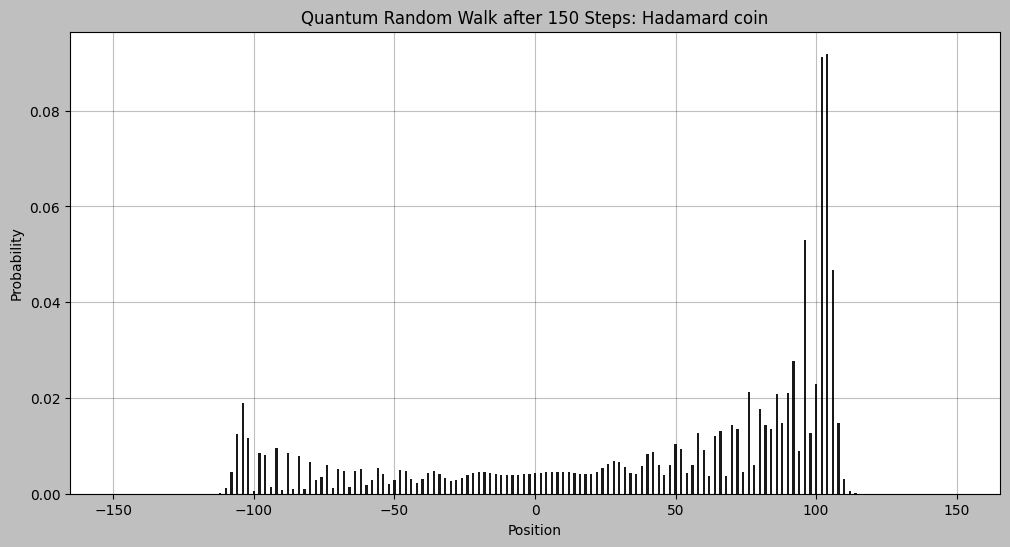

In [23]:
quantum_walk(steps = 150, initial_state = 1)

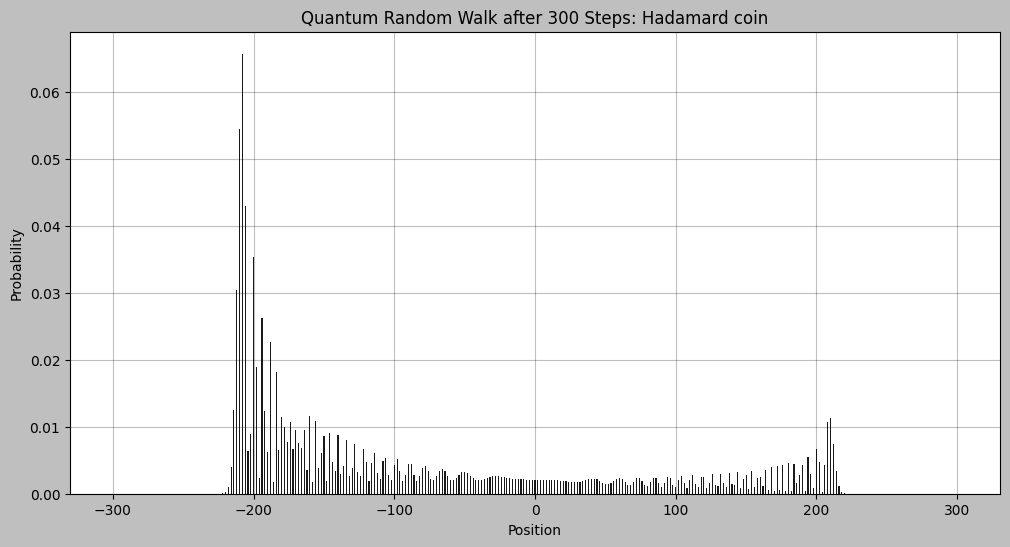

In [24]:
quantum_walk(steps = 300, initial_state = 0)

Another popular choice is the Grover coin:

\begin{align*}
    G = \begin{pmatrix} 
        - 1 / 2 & \sqrt{3} / 2 \\ 
        \sqrt{3} / 2 & 1 / 2 
    \end{pmatrix}
\end{align*}

In [25]:
# Quantum walk using the Grover coin
def quantum_walk(steps: int):
    # Total positions needed: 2 * steps + 1 (from - steps to + steps)
    size = 2 * steps + 1
    
    # Initialize state: [coin (2), position (size)]
    # coin 0 = |0⟩ (left), coin 1 = |1⟩ (right)
    state = np.zeros((2, size), dtype = np.complex64)
    
    # Starting from a symmetric initial state (|0⟩ + i|1⟩)/√2
    state[0, steps] = 1.0 / np.sqrt(2)  # |0⟩ component
    state[1, steps] = 1j / np.sqrt(2)   # |1⟩ component (with phase i)

    # Grover coin operator
    G = np.array([[- 1, np.sqrt(3)],
                  [np.sqrt(3), 1]]) / 2
    
    for _ in range(steps):

        # Applying Grover to coin state
        new_state = np.zeros_like(state)

        for j in range(size):
            new_state[:, j] = G @ state[:, j]
        
        # Applying the shift operator
        shifted_state = np.zeros_like(new_state)
        # Shift left for coin = 0
        shifted_state[0, :-1] = new_state[0, 1:]  # positions 0 → -1, ..., size-1 → size-2
        # Shift right for coin = 1
        shifted_state[1, 1:] = new_state[1, :-1]  # positions 0 → +1, ..., size-1 → size
        
        state = shifted_state
    
    # Computing probabilities
    prob = np.abs(state[0]) ** 2 + np.abs(state[1]) ** 2
    positions = np.arange(- steps, steps + 1)
    
    # Plot
    plt.figure(figsize = (12, 6))
    plt.bar(positions, prob, width = 0.8, alpha = 0.9)
    plt.xlabel("Position")
    plt.ylabel("Probability")
    plt.title(f"Quantum Random Walk after {steps} Steps: Grover coin")
    plt.grid(True, alpha = 0.25)
    plt.show()

    return None

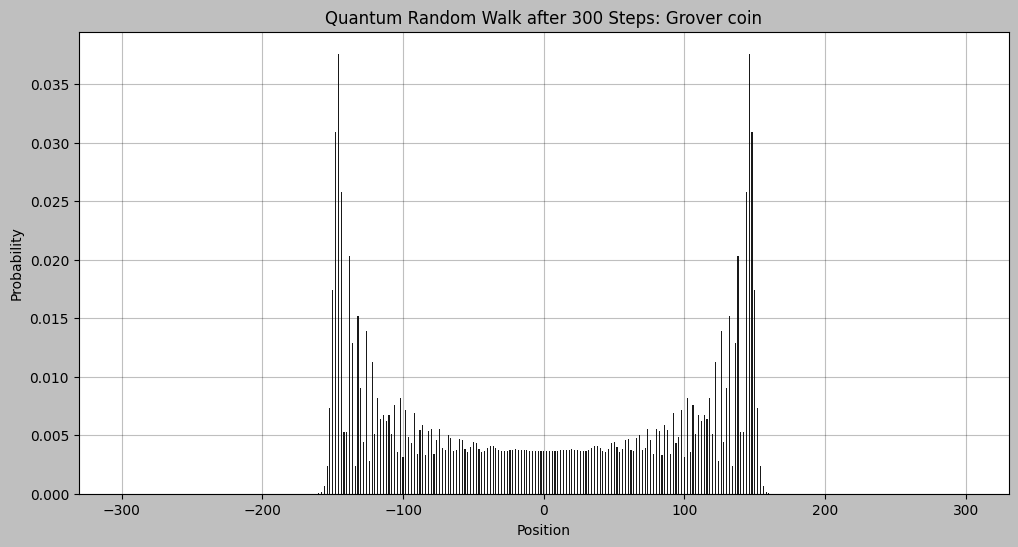

In [26]:
# With Grover coin
quantum_walk(steps = 300)